In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
from describe import describe as db

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv('crop_yield.csv')
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,False,True,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,True,True,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,False,False,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,False,True,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,True,True,Cloudy,110,7.248251


In [5]:
df.shape

(1000000, 10)

In [6]:
df.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

In [7]:
db(df)

,variable,dtype,count,unique,missing value
0,Region,object,1000000,4,0
1,Soil_Type,object,1000000,6,0
2,Crop,object,1000000,6,0
3,Rainfall_mm,float64,1000000,1000000,0
4,Temperature_Celsius,float64,1000000,1000000,0
5,Fertilizer_Used,bool,1000000,2,0
6,Irrigation_Used,bool,1000000,2,0
7,Weather_Condition,object,1000000,3,0
8,Days_to_Harvest,int64,1000000,90,0
9,Yield_tons_per_hectare,float64,1000000,1000000,0


In [8]:
df['Region'].unique()

array(['West', 'South', 'North', 'East'], dtype=object)

In [9]:
df['Region'].value_counts()

North    250173
West     250074
South    250054
East     249699
Name: Region, dtype: int64

In [10]:
df['Soil_Type'].unique()

array(['Sandy', 'Clay', 'Loam', 'Silt', 'Peaty', 'Chalky'], dtype=object)

In [11]:
df['Soil_Type'].value_counts()

Sandy     167119
Loam      166795
Chalky    166779
Silt      166672
Clay      166352
Peaty     166283
Name: Soil_Type, dtype: int64

In [12]:
df['Crop'].unique()

array(['Cotton', 'Rice', 'Barley', 'Soybean', 'Wheat', 'Maize'],
      dtype=object)

In [13]:
df['Crop'].value_counts()

Maize      166824
Rice       166792
Barley     166777
Wheat      166673
Cotton     166585
Soybean    166349
Name: Crop, dtype: int64

In [14]:
df['Fertilizer_Used'].unique()

array([False,  True])

In [15]:
df['Fertilizer_Used'].value_counts()

False    500060
True     499940
Name: Fertilizer_Used, dtype: int64

In [16]:
df['Irrigation_Used'].unique()

array([ True, False])

In [17]:
df['Irrigation_Used'].value_counts()

False    500509
True     499491
Name: Irrigation_Used, dtype: int64

In [18]:
df['Weather_Condition'].unique()

array(['Cloudy', 'Rainy', 'Sunny'], dtype=object)

In [19]:
df['Weather_Condition'].value_counts()

Sunny     333790
Rainy     333561
Cloudy    332649
Name: Weather_Condition, dtype: int64

In [20]:
df.duplicated().sum()

0

In [21]:
continuous = ['Rainfall_mm','Temperature_Celsius','Days_to_Harvest','Yield_tons_per_hectare']
discrete = ['Region','Soil_Type','Crop','Fertilizer_Used','Irrigation_Used','Weather_Condition',]

In [22]:
df[discrete].describe()

,Region,Soil_Type,Crop,Fertilizer_Used,Irrigation_Used,Weather_Condition
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,4,6,6,2,2,3
top,North,Sandy,Maize,False,False,Sunny
freq,250173,167119,166824,500060,500509,333790


In [23]:
df[continuous].describe()

,Rainfall_mm,Temperature_Celsius,Days_to_Harvest,Yield_tons_per_hectare
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,549.981901,27.504965,104.495025,4.649472
std,259.851320,7.220608,25.953412,1.696572
min,100.000896,15.000034,60.000000,-1.147613
25%,324.891090,21.254502,82.000000,3.417637
50%,550.124061,27.507365,104.000000,4.651808
75%,774.738520,33.753267,127.000000,5.879200
max,999.998098,39.999997,149.000000,9.963372


In [24]:
df[continuous].skew()

Rainfall_mm              -0.000934
Temperature_Celsius      -0.000534
Days_to_Harvest           0.000033
Yield_tons_per_hectare   -0.000862
dtype: float64

In [25]:
df.columns

Index(['Region', 'Soil_Type', 'Crop', 'Rainfall_mm', 'Temperature_Celsius',
       'Fertilizer_Used', 'Irrigation_Used', 'Weather_Condition',
       'Days_to_Harvest', 'Yield_tons_per_hectare'],
      dtype='object')

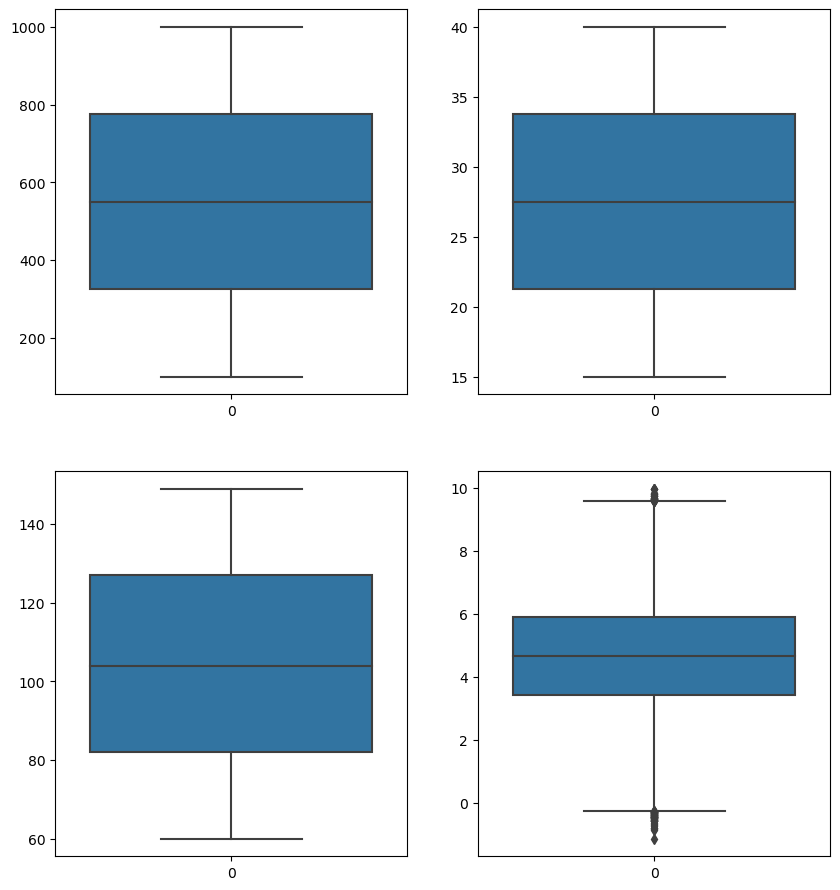

In [26]:
plt.figure(figsize=(10,11))
plt.subplot(2,2,1)
sns.boxplot(df['Rainfall_mm'])
plt.subplot(2,2,2)
sns.boxplot(df['Temperature_Celsius'])
plt.subplot(2,2,3)
sns.boxplot(df['Days_to_Harvest'])
plt.subplot(2,2,4)
sns.boxplot(df['Yield_tons_per_hectare'])
plt.show()

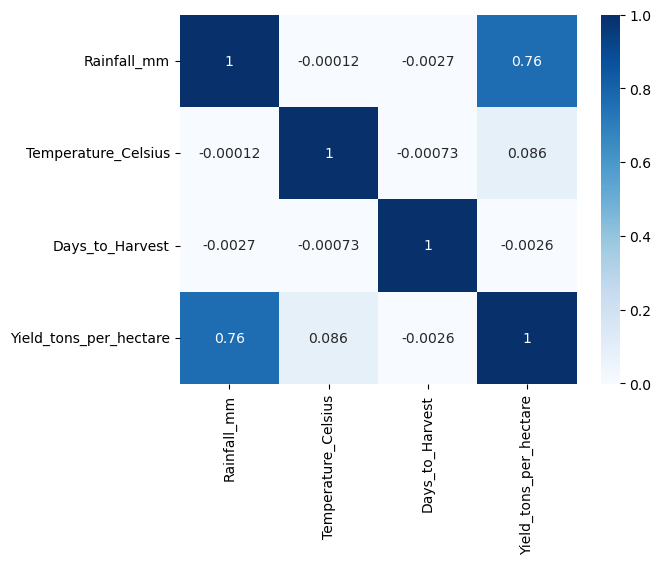

In [27]:
sns.heatmap(df[continuous].corr(),annot=True,cmap='Blues')
plt.show()

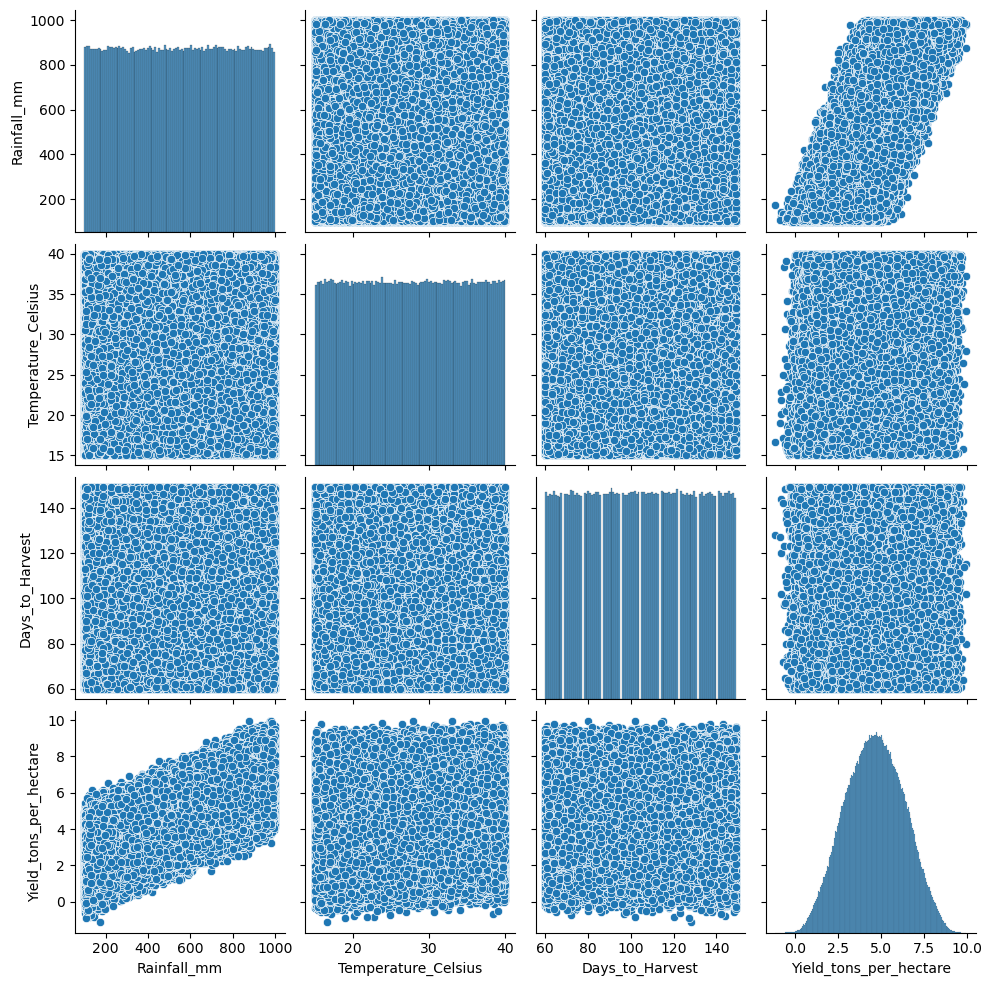

In [28]:
sns.pairplot(df[continuous])
plt.show()

In [29]:
Q1= df['Yield_tons_per_hectare'].quantile(0.25)
Q3= df['Yield_tons_per_hectare'].quantile(0.75)
IQR= Q3-Q1
LL= Q1-(1.5*IQR)
UL= Q3+(1.5*IQR)

In [30]:
df[(df['Yield_tons_per_hectare'] < LL) | (df['Yield_tons_per_hectare'] > UL)]

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
11596,West,Peaty,Wheat,957.380991,36.324216,True,True,Sunny,73,9.727004
39669,East,Loam,Barley,147.755191,20.390486,False,False,Cloudy,72,-0.469229
54745,North,Peaty,Barley,119.136310,15.984143,False,False,Cloudy,93,-0.290180
77504,West,Sandy,Wheat,120.422223,22.809881,False,False,Rainy,120,-0.841617
93760,West,Clay,Soybean,108.811480,17.936402,False,False,Rainy,88,-0.434482
...,...,...,...,...,...,...,...,...,...,...
942403,South,Silt,Maize,987.281001,23.821032,True,True,Rainy,114,9.826285
947118,North,Clay,Cotton,110.727929,23.191667,False,False,Rainy,80,-0.507013
949892,North,Silt,Soybean,107.476604,15.473496,False,False,Sunny,80,-0.309650
966078,South,Chalky,Wheat,948.730680,38.383078,True,True,Cloudy,82,9.650875


In [31]:
df['Yield_tons_per_hectare'] = df['Yield_tons_per_hectare'].abs()

In [32]:
df[(df['Yield_tons_per_hectare'] < LL) | (df['Yield_tons_per_hectare'] > UL)].head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
11596,West,Peaty,Wheat,957.380991,36.324216,True,True,Sunny,73,9.727004
173732,South,Clay,Rice,998.991449,22.513905,True,True,Cloudy,68,9.613384
224117,West,Silt,Barley,954.911259,34.653132,True,True,Rainy,146,9.580166
230072,North,Loam,Cotton,956.623791,39.830278,True,True,Cloudy,149,9.647672
288994,East,Loam,Wheat,965.464197,34.606854,True,True,Rainy,124,9.668197


In [33]:
df[['Fertilizer_Used', 'Irrigation_Used']] = df[['Fertilizer_Used', 'Irrigation_Used']].astype(int)

In [34]:
df.head()

,Region,Soil_Type,Crop,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Weather_Condition,Days_to_Harvest,Yield_tons_per_hectare
0,West,Sandy,Cotton,897.077239,27.676966,0,1,Cloudy,122,6.555816
1,South,Clay,Rice,992.673282,18.026142,1,1,Rainy,140,8.527341
2,North,Loam,Barley,147.998025,29.794042,0,0,Sunny,106,1.127443
3,North,Sandy,Soybean,986.866331,16.644190,0,1,Rainy,146,6.517573
4,South,Silt,Wheat,730.379174,31.620687,1,1,Cloudy,110,7.248251


In [35]:
df=pd.get_dummies(df,columns=['Region','Soil_Type','Crop','Weather_Condition'],dtype=int,drop_first=True)

In [36]:
df.head()

,Rainfall_mm,Temperature_Celsius,Fertilizer_Used,Irrigation_Used,Days_to_Harvest,Yield_tons_per_hectare,Region_North,Region_South,Region_West,Soil_Type_Clay,Soil_Type_Loam,Soil_Type_Peaty,Soil_Type_Sandy,Soil_Type_Silt,Crop_Cotton,Crop_Maize,Crop_Rice,Crop_Soybean,Crop_Wheat,Weather_Condition_Rainy,Weather_Condition_Sunny
0,897.077239,27.676966,0,1,122,6.555816,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
1,992.673282,18.026142,1,1,140,8.527341,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
2,147.998025,29.794042,0,0,106,1.127443,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,986.866331,16.644190,0,1,146,6.517573,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0
4,730.379174,31.620687,1,1,110,7.248251,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0


In [39]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


features = df.columns.tolist()

X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

vif_df = pd.DataFrame()
vif_df['Feature'] = features
vif_df['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_df)

                    Feature        VIF
0               Rainfall_mm   7.734409
1       Temperature_Celsius   1.082632
2           Fertilizer_Used   3.248277
3           Irrigation_Used   2.437157
4           Days_to_Harvest   1.000021
5    Yield_tons_per_hectare  11.497375
6              Region_North   1.501132
7              Region_South   1.500980
8               Region_West   1.501007
9            Soil_Type_Clay   1.665192
10           Soil_Type_Loam   1.666506
11          Soil_Type_Peaty   1.664983
12          Soil_Type_Sandy   1.667496
13           Soil_Type_Silt   1.666151
14              Crop_Cotton   1.665886
15               Crop_Maize   1.666600
16                Crop_Rice   1.666508
17             Crop_Soybean   1.665189
18               Crop_Wheat   1.666162
19  Weather_Condition_Rainy   1.334729
20  Weather_Condition_Sunny   1.334740


In [40]:
df.to_csv('cleaned_data.csv', index=False)